# Problem Statement

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



---
# Importing Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading data into pandas DataFrame.

In [41]:
train = pd.read_csv(r"D:\Data Science Course\Projects\Analytics vidya\loan\train.csv")
test = pd.read_csv(r"D:\Data Science Course\Projects\Analytics vidya\loan\test.csv")

In [42]:
loan_df = pd.concat([train,test], axis = 0)

## Data Variable Discription


Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married:	Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount	Loan: amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

Loan_Status:	(Target) Loan approved (Y/N)

---

In [43]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [44]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [45]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [46]:
loan_df.shape

(981, 13)

## Checking Bias 

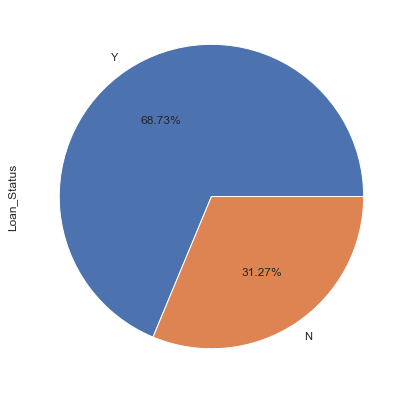

In [47]:
loan_df['Loan_Status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(7,7))

---
# Missing Value Analysis

In [48]:
loan_df.isna().sum()/loan_df.shape[0]*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [49]:
ls = [2,4,1,6,8,6,9,3,10]
ls.sort()

In [50]:
ls

[1, 2, 3, 4, 6, 6, 8, 9, 10]

---
## 1. 'Gender'

In [51]:
loan_df['Gender'].isna().value_counts(),loan_df['Gender'].value_counts()

(False    957
 True      24
 Name: Gender, dtype: int64,
 Male      775
 Female    182
 Name: Gender, dtype: int64)

In [52]:
loan_df[loan_df['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


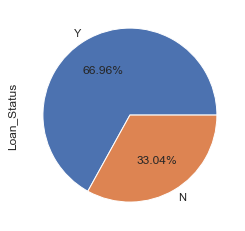

In [53]:
loan_df[ (loan_df['Gender']=='Female')]['Loan_Status'].value_counts().plot.pie(autopct='%1.2f%%')

In [54]:
loan_df.groupby('Gender')['ApplicantIncome'].median()

Gender
Female    3634.5
Male      3865.0
Name: ApplicantIncome, dtype: float64

In [55]:
loan_df.groupby('Gender')['Dependents'].value_counts()

Gender  Dependents
Female  0             123
        1              32
        2              13
        3+              9
Male    0             408
        2             145
        1             125
        3+             78
Name: Dependents, dtype: int64

In [56]:
loan_df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

##### Imputing 'Gender': 'Male' for those who have 'Dependents'>=2

In [686]:
loan_df.loc[ (loan_df['Gender'].isna()) & ((loan_df['Dependents'] == '2') | (loan_df['Dependents']== '3+')),'Gender'] = 'Male'

###### imputing 'Gender': 'Female' for those who have 'LoanAmount' less than 100.

In [687]:
loan_df.loc[ (loan_df['Gender'].isna()) & (loan_df['LoanAmount']<100),'Gender'] = 'Female'

###### Imputing remaining missing 'Gender' Values by 'Female'

In [688]:
loan_df.loc[ (loan_df['Gender'].isna()),'Gender'] = 'Female'

In [689]:
loan_df['Gender'].isna().sum()

0

---
## 2. 'Dependents'

In [690]:
loan_df[loan_df['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [691]:
# Checking bias in loan status w.r.t. 'Dependents'
loan_df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

In [692]:
loan_df.groupby('Married')['Dependents'].value_counts()

Married  Dependents
No       0             276
         1              36
         2              14
         3+             12
Yes      0             269
         2             146
         1             124
         3+             79
Name: Dependents, dtype: int64

In [693]:
loan_df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

##### Imputing 'Dependents' : '0'  for those who have marriage status as: 'No'

In [694]:
loan_df.loc[ (loan_df['Dependents'].isna()) & (loan_df['Married'] == 'No'), 'Dependents'] = '0'

In [695]:
loan_df.groupby('Dependents').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,,,,,
0,3581.0,1138.5,122.0,360.0,1.0
1,3844.5,1500.0,130.5,360.0,1.0
2,4183.5,1123.0,135.0,360.0,1.0
3+,4416.0,0.0,130.0,360.0,1.0


##### Imputing 'Dependents': '3+' for those who have 'CoapplicantIncome' : 0

In [696]:
loan_df.loc[ (loan_df['Dependents'].isna()) & (loan_df['CoapplicantIncome'] == 0), 'Dependents'] = '3+'

In [697]:
loan_df.groupby(['Education','Self_Employed']).get_group(('Not Graduate','No'))['Dependents'].value_counts()

0     92
2     38
1     25
3+    22
Name: Dependents, dtype: int64

In [698]:
loan_df.groupby(['Education','Self_Employed']).get_group(('Graduate','No'))['Dependents'].value_counts()

0     376
1      96
2      91
3+     59
Name: Dependents, dtype: int64

In [699]:
loan_df.groupby(['Education','Self_Employed']).get_group(('Graduate','Yes'))['Dependents'].value_counts()

0     47
1     21
2     19
3+     6
Name: Dependents, dtype: int64

In [700]:
loan_df.groupby(['Education','Self_Employed']).get_group(('Not Graduate','Yes'))['Dependents'].value_counts()

0     13
3+     6
1      4
2      2
Name: Dependents, dtype: int64

##### Imputing remaining null values of 'Dependents' as '0'

In [701]:
loan_df.loc[ (loan_df['Dependents'].isna()), 'Dependents'] = '0'

---
## 3. 'Self_Employed'

In [702]:
#loan_df[ (loan_df['Self_Employed'] == 'No')]['Loan_Status'].value_counts().plot.pie(autopct='%1.2f%%')
#loan_df[ (loan_df['Self_Employed'] == 'Yes')]['Loan_Status'].value_counts().plot.pie(autopct='%1.2f%%')

In [703]:
loan_df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [704]:
loan_df[loan_df['Self_Employed'].isna()]#['Loan_Status'].value_counts().plot.pie(autopct='%1.2f%%')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


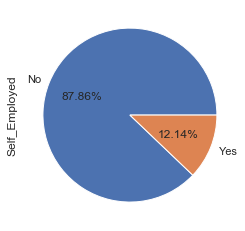

In [705]:
loan_df.groupby('Education').get_group(('Not Graduate'))['Self_Employed'].value_counts().plot.pie(autopct='%.2f%%')

In [706]:
loan_df.groupby('Education')['Self_Employed'].value_counts()

Education     Self_Employed
Graduate      No               626
              Yes               94
Not Graduate  No               181
              Yes               25
Name: Self_Employed, dtype: int64

It seems that peoples with 'Education' status 'Not Graduate' are less likely to be Self_Employed. 

###### So Imputing  'Self_Employed' :  'No'  for those who have  'Education' status as 'Not Graduate'.

In [707]:
loan_df.loc[ (loan_df['Self_Employed'].isna()) & (loan_df['Education'] == 'Not Graduate'), 'Self_Employed'] = 'No'

In [708]:
loan_df.groupby(['Education','Self_Employed']).median()['LoanAmount']#get_group(('Not Graduate','No'))['LoanAmount'].median()

Education     Self_Employed
Graduate      No               130.0
              Yes              150.0
Not Graduate  No               117.0
              Yes              130.0
Name: LoanAmount, dtype: float64

In [709]:
loan_df.groupby(['Education','Self_Employed']).median()['ApplicantIncome']#get_group(('Not Graduate','No'))['LoanAmount'].median()

Education     Self_Employed
Graduate      No               3870.0
              Yes              5825.5
Not Graduate  No               3271.0
              Yes              4344.0
Name: ApplicantIncome, dtype: float64

##### Imputing "Self_Employed": 'No' for those who have 'LoanAmount' <= 130   and  'ApplicantIncome' < 5000.

In [710]:
loan_df.loc[(loan_df['Self_Employed'].isna()) & ((loan_df['LoanAmount']<=130) & (loan_df['ApplicantIncome']<=5000)), 'Self_Employed'] = 'No'

##### Imputing 'Self_Employed' :'Yes' for all remaining missing values.

In [711]:
loan_df.loc[ (loan_df['Self_Employed'].isna()), 'Self_Employed'] = 'Yes'

In [712]:
loan_df['Self_Employed'].value_counts()

No     838
Yes    143
Name: Self_Employed, dtype: int64

---
## 4. 'Married'

In [713]:
loan_df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [714]:
loan_df[ loan_df['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,3+,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,3+,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [715]:
loan_df[ (loan_df['Dependents'] == '3+')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
61,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,LP002869,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,NaN
345,LP002878,Male,Yes,3+,Graduate,No,8334,0.0,260.0,360.0,1.0,Urban,NaN
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187.0,158.0,180.0,0.0,Semiurban,NaN
355,LP002932,Male,Yes,3+,Graduate,No,7603,1213.0,197.0,360.0,1.0,Urban,NaN


##### Imputing all missing values of 'married' as 'Yes'.

In [716]:
loan_df['Married'].fillna(value = 'Yes',inplace = True)

In [717]:
loan_df['Married'].isna().sum()

0

---
## 5. LoanAmount

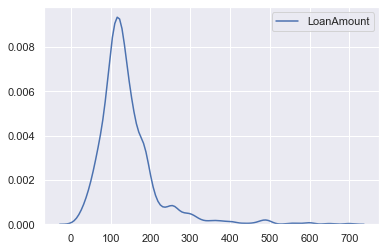

In [718]:
sns.kdeplot(loan_df['LoanAmount'])

In [719]:
loan_df[loan_df['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,Yes,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,3+,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [720]:
#loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,2500)) & (loan_df['Property_Area'] == 'Rural')]#['LoanAmount']#.median()

In [721]:
loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,2500)) & (loan_df['Property_Area'] == 'Urban')]['LoanAmount'].median()

102.0

In [722]:
# median Loan_Amount for applicant_income_range : (2000,2500), coapplicant_income>0 and property_area: rural
loan_df[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,4000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Rural')]#['LoanAmount'].median()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
322,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural,Y
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural,Y


In [723]:
loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(3000,4000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural')]['LoanAmount'].median()

104.5

#### <font color = 'Red'> Filling Missing Values 'LoanAmount' on basis of : 'ApplicantsIncome (range)', 'CoapplicantsIncome', 'Property_Area'

In [724]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(1800,5000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Urban'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(1800,5000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Urban')]['LoanAmount'].median()

In [725]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(5000,7000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Urban'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(5000,7000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Urban')]['LoanAmount'].median()

In [726]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(9999,15000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Urban'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(9999,15000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Urban')]['LoanAmount'].median()

In [727]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,5000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Urban'),'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,5000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Urban')]['LoanAmount'].median()

In [728]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(8000,10000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Urban'),'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(8000,10000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Urban')]['LoanAmount'].median()

In [729]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(3000,4800)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Semiurban'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(3000,4800)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Semiurban')]['LoanAmount'].median()

In [730]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,2500)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Semiurban'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,2500)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Semiurban')]['LoanAmount'].median()

In [731]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(7000,11000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Semiurban'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(7000,11000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Semiurban')]['LoanAmount'].median()

In [732]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,4000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Rural'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(2000,4000)) & (loan_df['CoapplicantIncome']>0) & (loan_df['Property_Area'] == 'Rural')]['LoanAmount'].median()

In [733]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(4500,7000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(4500,6500)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural')]['LoanAmount'].median()

In [734]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(9000,13500)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(9000,13500)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural')]['LoanAmount'].median()

In [735]:
loan_df.loc[ (loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(17000,23000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural'), 'LoanAmount'] = loan_df[ (~loan_df['LoanAmount'].isna())  & (loan_df['ApplicantIncome'].between(17000,23000)) & (loan_df['CoapplicantIncome']==0) & (loan_df['Property_Area'] == 'Rural')]['LoanAmount'].median()

In [736]:
loan_df['LoanAmount'].isna().sum()

0

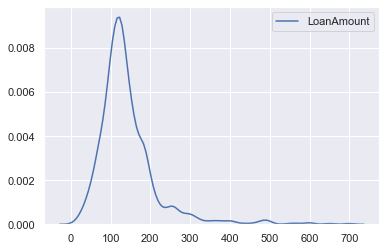

In [737]:
sns.kdeplot(loan_df['LoanAmount'])

---
## 6. 'Loan_Amount_Term'

In [738]:
loan_df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

#### replacing loan_Amount_Term: 350 for 360.

In [739]:
loan_df.loc[ (loan_df['Loan_Amount_Term'] == 350), 'Loan_Amount_Term'] = 360.0

In [740]:
loan_df[ (loan_df['Loan_Amount_Term'].isna())]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [741]:
loan_df[ (loan_df['ApplicantIncome'].between(2500,5500)) & (loan_df['CoapplicantIncome'] == 0) & (loan_df['LoanAmount'].between(85,100))]['Loan_Amount_Term'].value_counts()

360.0    33
180.0     1
480.0     1
240.0     1
Name: Loan_Amount_Term, dtype: int64

### <font color = 'Red'>Imputing Missing Values of 'Loan_Amount_Term' on basis of 'LoanAmount', 'CoapplicantIncome', 'LoanAmount'. </font>

In [742]:
loan_df.loc[(loan_df['Loan_Amount_Term'].isna()) & (loan_df['ApplicantIncome'].between(2500,5500)) & (loan_df['CoapplicantIncome'] == 0) & (loan_df['LoanAmount'].between(80,100)), 'Loan_Amount_Term'] = 360.0

In [743]:
loan_df.loc[ (loan_df['Loan_Amount_Term'].isna()) & (loan_df['ApplicantIncome'].between(5000,6000)) & (loan_df['CoapplicantIncome'] == 0) & (loan_df['LoanAmount'].between(120,130)), 'Loan_Amount_Term'] = 360.0

In [744]:
loan_df.loc[ (loan_df['ApplicantIncome'].between(1500,2000)) & (loan_df['LoanAmount'].between(79,121)), 'Loan_Amount_Term'] = 360.0

In [745]:
# Checking for loan_amount_term = 180
loan_df[ (loan_df['Loan_Amount_Term'] == 180)][['LoanAmount','ApplicantIncome']].median()

LoanAmount          120.0
ApplicantIncome    3813.0
dtype: float64

In [746]:
loan_df.loc[ (loan_df['Loan_Amount_Term'].isna()) & (loan_df['LoanAmount'].between(112,125)) & (loan_df['ApplicantIncome'].between(2500,4000)), 'Loan_Amount_Term'] = 180.0

In [747]:
# Imputing all remaining missing values as : 360
loan_df.loc[ (loan_df['Loan_Amount_Term'].isna()), 'Loan_Amount_Term'] = 360.0

In [748]:
loan_df['Loan_Amount_Term'].value_counts()

360.0    842
180.0     68
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [749]:
loan_df['Loan_Amount_Term'].replace({6.0:12.0}, inplace=True)

---
## 7. 'Credit_History'

In [750]:
loan_df[ (loan_df['Credit_History'].isna())]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,NaN
351,LP002901,Male,No,0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,NaN
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,NaN
360,LP002965,Female,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,NaN


In [751]:
loan_df[ (loan_df['Credit_History'] == 1)]['Self_Employed'].value_counts()

No     642
Yes    112
Name: Self_Employed, dtype: int64

In [752]:
loan_df[ (loan_df['Credit_History'] == 0)]['Self_Employed'].value_counts()

No     132
Yes     16
Name: Self_Employed, dtype: int64

#### Imputing missing values of 'Credit_History' with the help of  'Self_Employed'.

In [753]:
loan_df.loc[ (loan_df['Credit_History'].isna()) & (loan_df['Self_Employed'] == 'No'), 'Credit_History'] = 0.0

In [754]:
loan_df['Credit_History'].fillna(1.0,inplace=True)

---
# Creating Features

1. 'EMI' : LoanAmount/Loan_Amount_Term

2. 'Total_Income' : ApplicantIncome + CoapplicantIncome


In [755]:
loan_df['EMI'] = loan_df.apply(lambda row : 1000*row['LoanAmount']/row['Loan_Amount_Term'],axis=1)

In [756]:
loan_df['Total_Income'] = loan_df.apply(lambda row : row['ApplicantIncome']+row['CoapplicantIncome'],axis=1)

In [757]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,135.5,360.0,1.0,Urban,Y,376.388889,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,355.555556,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,183.333333,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,333.333333,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,391.666667,6000.0


In [758]:
loan_df['is_Family'] = loan_df.apply(lambda row : 1 if ((row['Married'] == 'Yes') | (row['Dependents'] != '0')) else 0, axis=1)

---
# Outlier Analysis

In [759]:
col_list = ['ApplicantIncome','CoapplicantIncome','LoanAmount','EMI','Total_Income']

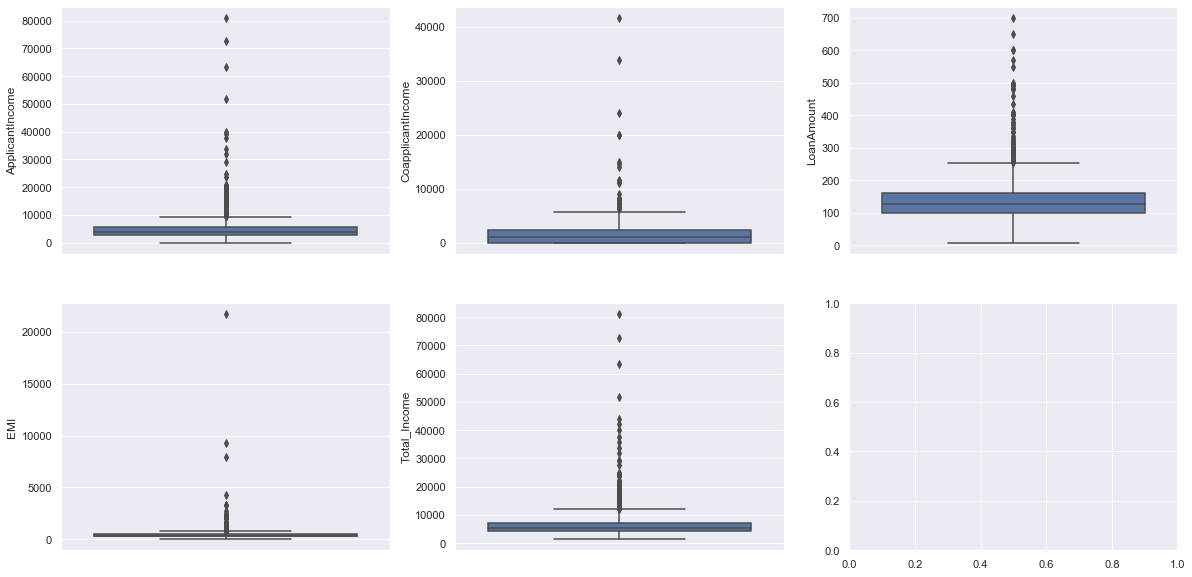

In [760]:
f,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
axx = ax.flatten()
for pos,col in enumerate(col_list):
    sns.boxplot(loan_df[col], ax = axx[pos],orient='v')

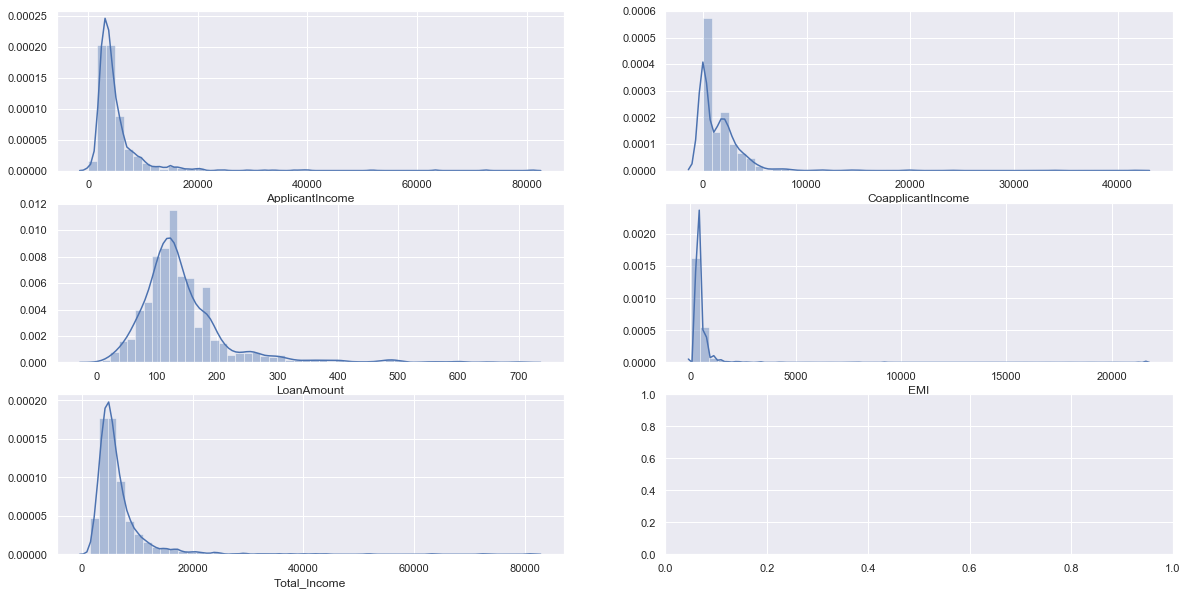

In [761]:
f,ax = plt.subplots(nrows=3, ncols=2, figsize = (20,10))
axx = ax.flatten()
for pos,col in enumerate(col_list):
    sns.distplot(loan_df[col], ax=axx[pos])

### Insights:

All the columns above have right skewed data.

In [762]:
col_ls = ['LoanAmount','EMI','Total_Income']

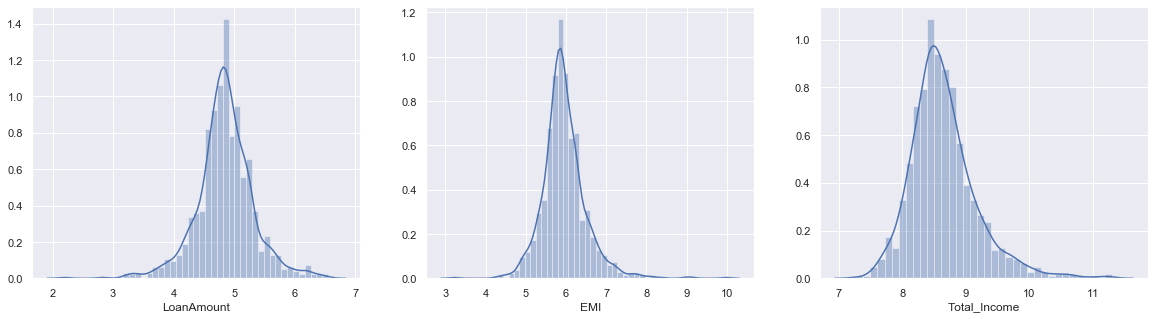

In [763]:
f,ax = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
axx = ax.flatten()
for pos,col in enumerate(col_ls):
    sns.distplot(np.log(loan_df[col]), ax=axx[pos])

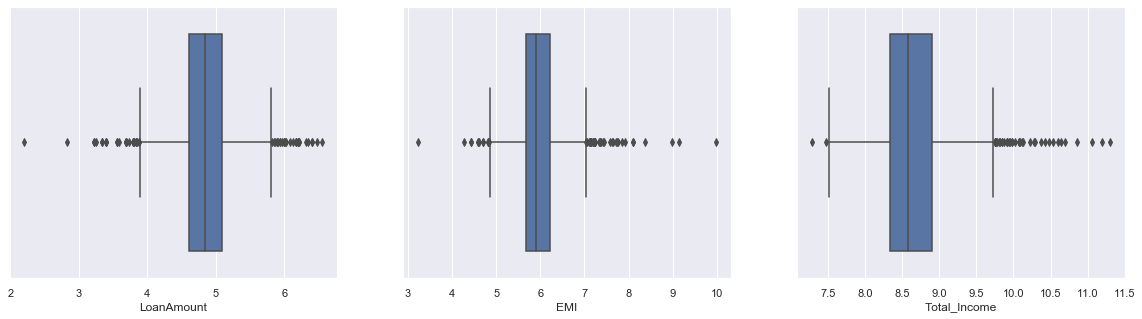

In [764]:
f,ax = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
axx = ax.flatten()
for pos,col in enumerate(col_ls):
    sns.boxplot(np.log(loan_df[col]), ax=axx[pos])

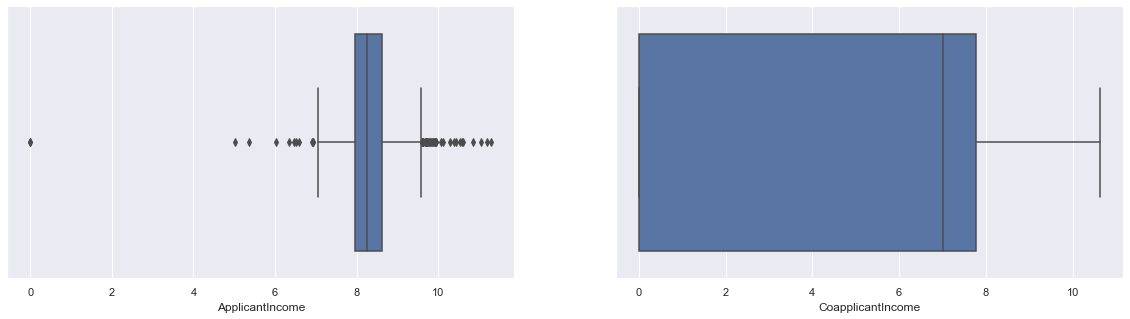

In [765]:
col_ls = ['ApplicantIncome', 'CoapplicantIncome']
f,ax = plt.subplots(nrows=1, ncols=2, figsize = (20,5))
axx = ax.flatten()
for pos,col in enumerate(col_ls):
    sns.boxplot(np.log(loan_df[col]+1), ax=axx[pos])

## We will do log trnsformation for all columns except 'ApplicantIncome'

In [766]:
loan_df['CoapplicantIncome'] = np.log(loan_df['CoapplicantIncome']+1) #log(x+1) transformation
loan_df['ApplicantIncome'] = np.log(loan_df['ApplicantIncome']+1) #log(x+1) transformation
loan_df['LoanAmount'] = np.log(loan_df['LoanAmount'])
loan_df['EMI'] = np.log(loan_df['EMI'])
loan_df['Total_Income'] = np.log(loan_df['Total_Income'])

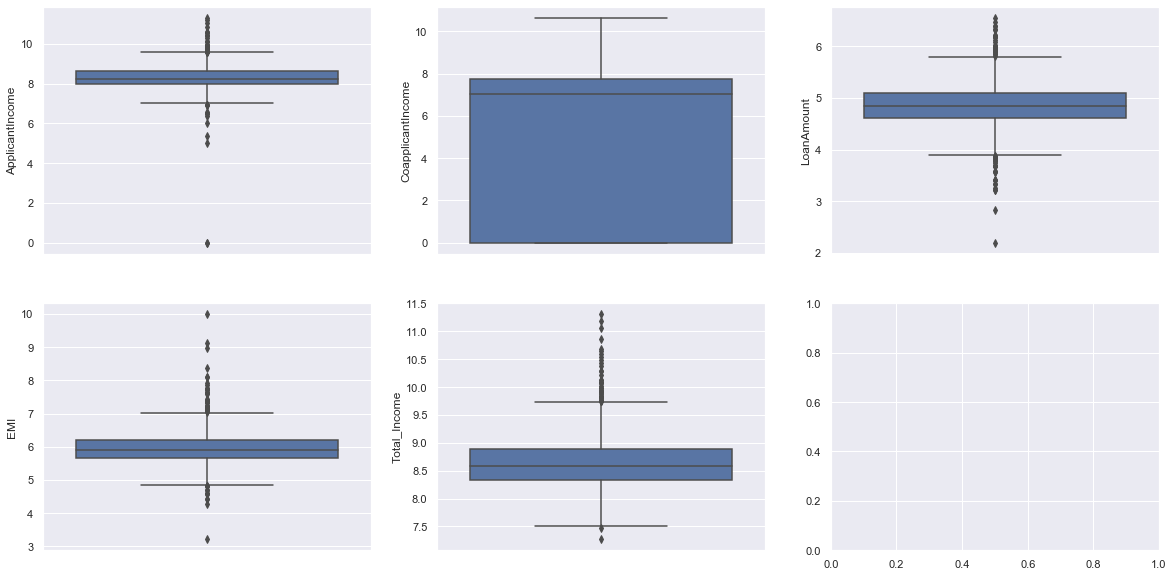

In [767]:
f,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
axx = ax.flatten()
for pos,col in enumerate(col_list):
    sns.boxplot(loan_df[col], ax = axx[pos],orient='v')

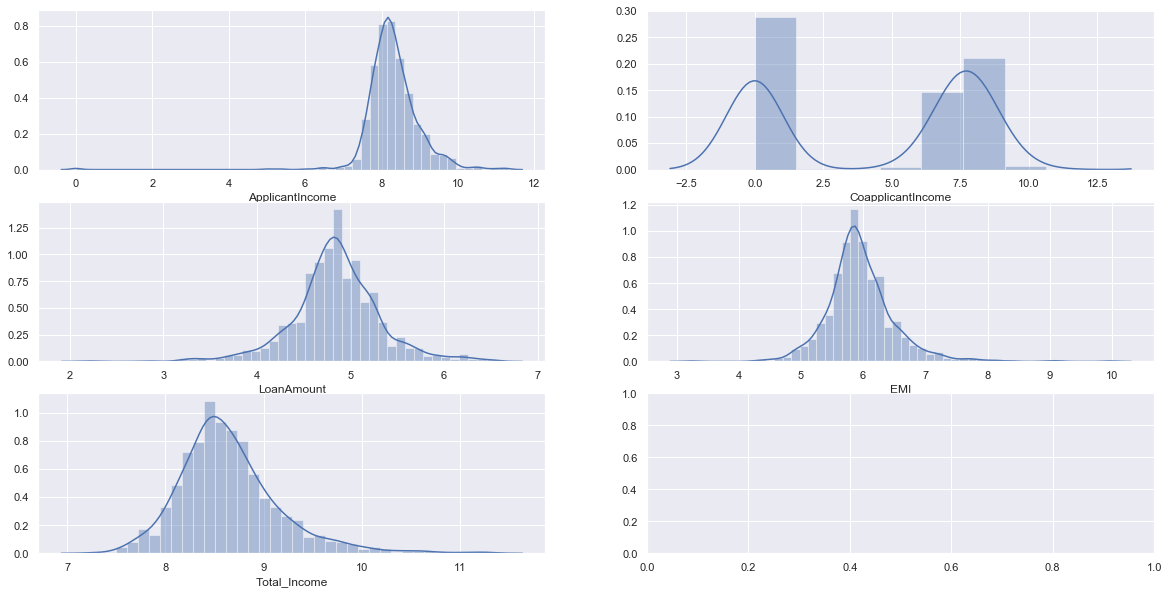

In [768]:
f,ax = plt.subplots(nrows=3, ncols=2, figsize = (20,10))
axx = ax.flatten()
for pos,col in enumerate(col_list):
    sns.distplot(loan_df[col], ax=axx[pos])

---
# Corelation Matrix

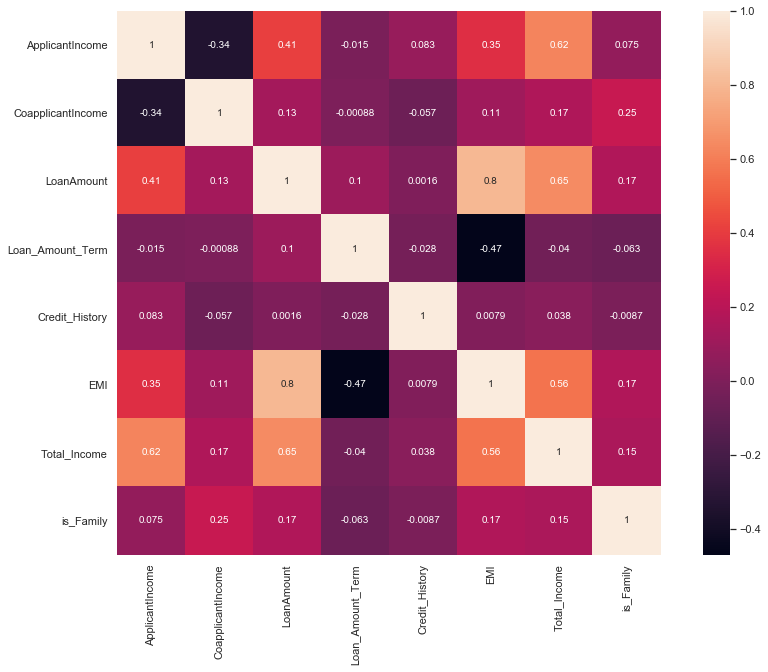

In [769]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_df.corr(),cbar=True,annot=True,square=True,annot_kws={'size': 10})

---
# Data Encoding

In [771]:
loan_df = loan_df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','EMI', 'Total_Income', 'is_Family', 'Loan_Status']]

In [772]:
loan_id = loan_df['Loan_ID']
loan_status = loan_df['Loan_Status']

In [773]:
loan_df = pd.get_dummies(loan_df.iloc[:,1:-1])

In [774]:
loan_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,EMI,Total_Income,is_Family,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.908972,360.0,1.0,5.930623,8.674026,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,8.430327,7.319202,4.852030,360.0,1.0,5.873682,8.714568,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,8.006701,0.000000,4.189655,360.0,1.0,5.211306,8.006368,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,7.857094,7.765993,4.787492,360.0,1.0,5.809143,8.505323,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,8.699681,0.000000,4.948760,360.0,1.0,5.970411,8.699515,0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,8.296547,7.483244,4.727388,360.0,1.0,5.749039,8.663196,1,0,1,...,0,0,1,0,1,0,1,0,0,1
363,8.333030,6.565265,4.744932,360.0,1.0,5.766583,8.490233,1,0,1,...,0,0,0,1,0,1,0,0,0,1
364,8.086718,7.597898,4.836282,360.0,0.0,5.857933,8.564649,0,0,1,...,0,0,0,1,0,1,0,0,1,0
365,8.517393,7.780721,5.062595,360.0,1.0,6.084246,8.908289,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [775]:
loan_df['Loan_ID'] = loan_id

In [776]:
loan_df['Loan_Status'] = loan_status

In [777]:
loan_df = loan_df[['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','is_Family', 'EMI', 'Total_Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status']]

In [798]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [800]:
loan_df['Loan_Amount_Term'] = label.fit_transform(loan_df['Loan_Amount_Term'])

---
# Min Max Scaling

In [801]:
col_list = ['ApplicantIncome','CoapplicantIncome','LoanAmount','EMI','Total_Income']

In [802]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [803]:
loan_df[col_list] = scaler.fit_transform(loan_df[col_list])

---
# Train Test Split

First we will seperate main test data from loan_df. 

---
## Seperating labeled and unlabeled data.

In [804]:
train_df = loan_df[ (~loan_df['Loan_Status'].isna())].copy()
test_df = loan_df[ (loan_df['Loan_Status'].isna())].copy()

In [805]:
train_df['Loan_Status'] = train_df['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)

In [806]:
train_df.iloc[:,1:-1]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_Family,EMI,Total_Income,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.767477,0.000000,0.622838,8,1.0,0,0.400870,0.347590,0,1,...,0,0,0,1,0,1,0,0,0,1
1,0.745900,0.688057,0.609760,8,1.0,1,0.392453,0.357654,0,1,...,1,0,0,1,0,1,0,1,0,0
2,0.708419,0.000000,0.457624,8,1.0,1,0.294535,0.181853,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0.695182,0.730059,0.594936,8,1.0,1,0.382912,0.305712,0,1,...,0,0,0,0,1,1,0,0,0,1
4,0.769732,0.000000,0.631977,8,1.0,0,0.406752,0.353918,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.705420,0.000000,0.474397,8,1.0,0,0.305330,0.173438,1,0,...,0,0,0,1,0,1,0,1,0,0
610,0.736178,0.000000,0.342605,5,1.0,1,0.322973,0.259759,0,1,...,0,0,1,1,0,1,0,1,0,0
611,0.795975,0.515610,0.766255,8,1.0,1,0.493176,0.434828,0,1,...,1,0,0,1,0,1,0,0,0,1
612,0.790446,0.000000,0.696827,8,1.0,1,0.448491,0.412042,0,1,...,0,1,0,1,0,1,0,0,0,1


---
## Now we will train model on 70% data of train_df (labeled_data)

In [807]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,1:-1],train_df['Loan_Status'], test_size = 0.30,random_state = 3)

---
# 1. Logistic Regression

In [808]:
from sklearn.linear_model import LogisticRegression

In [809]:
logistic = LogisticRegression(penalty='l1',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=2,
    class_weight={0:1, 1:1},
    random_state=None,
    solver='liblinear',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=True,
    n_jobs=None,
    l1_ratio=None,
)

In [810]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=2, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=True)

In [811]:
y_pred = logistic.predict(X_test)

In [812]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [813]:
accuracy_score(y_test, y_pred)

0.8108108108108109

In [814]:
confusion_matrix(y_test, y_pred)

array([[ 21,  24],
       [ 11, 129]], dtype=int64)

In [815]:
y_pred_prob = logistic.predict_proba(X_test)

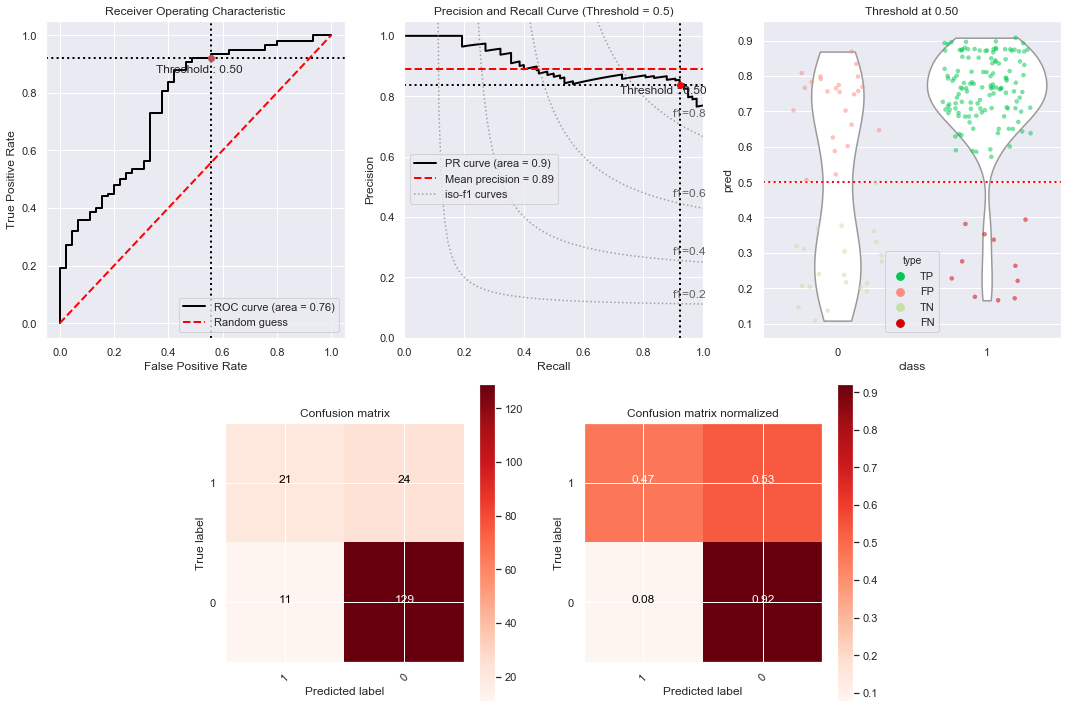

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

           1       0.66      0.47      0.55        45
           0       0.84      0.92      0.88       140

    accuracy                           0.81       185
   macro avg       0.75      0.69      0.71       185
weighted avg       0.80      0.81      0.80       185



In [851]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_prob[:,1], labels=["1", "0"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

In [861]:
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X = X_sca.fit_transform(train_df.iloc[:,1:-1])
y = train_df.iloc[:,-1]

In [857]:
from sklearn.model_selection import KFold
score = 0
i = 1
kfold_cv = KFold(n_splits=10)
correct = 0
total = 0
for train_indices, test_indices in kfold_cv.split(X):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices],y[train_indices], y[test_indices]
    clf = logistic.fit(X_train, y_train)
    correct += accuracy_score(y_test, clf.predict(X_test))
    print ("Acc : ", accuracy_score(y_test, clf.predict(X_test)))
    total += 1
print("Accuracy: {0:.2f}".format(correct/total))

Acc :  0.7419354838709677
Acc :  0.8225806451612904
Acc :  0.7419354838709677
Acc :  0.7258064516129032
Acc :  0.7704918032786885
Acc :  0.7049180327868853
Acc :  0.8360655737704918
Acc :  0.7704918032786885
Acc :  0.7868852459016393
Acc :  0.8032786885245902
Accuracy: 0.77


In [916]:
# Grid search
from sklearn.model_selection import GridSearchCV
# insert parameters that you want to optimize
parameters = [
    {
        'C': [1,2,3,4,5,6,7,8,9,10,10,30,50,100,200,500,1000],
        'fit_intercept' : [True, False],
        'class_weight' : [{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}]
    }
]
grid_search = GridSearchCV(estimator=logistic, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

In [917]:
print (grid_search.best_estimator_)
print (grid_search.best_score_)
print (grid_search.best_params_)


LogisticRegression(C=2, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=2, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=True)
0.772025383395029
{'C': 2, 'class_weight': {0: 1, 1: 1}, 'fit_intercept': True}


---
# 2. Decision Tree

In [858]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [894]:
clf = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7213114754098361

In [895]:
from sklearn.model_selection import KFold
score = 0
i = 1
kfold_cv = KFold(n_splits=10)
correct = 0
total = 0
for train_indices, test_indices in kfold_cv.split(X):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices],y[train_indices], y[test_indices]
    clf = clf
    correct += accuracy_score(y_test, clf.predict(X_test))
    print ("Acc : ", accuracy_score(y_test, clf.predict(X_test)))
    total += 1
print("Accuracy: {0:.2f}".format(correct/total))

Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  1.0
Acc :  0.7213114754098361
Accuracy: 0.97


---
# 3. Random Forest

In [879]:
from sklearn.ensemble import RandomForestClassifier

In [888]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=None,
    random_state=3,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7540983606557377

In [889]:
from sklearn.model_selection import KFold
score = 0
i = 1
kfold_cv = KFold(n_splits=10)
correct = 0
total = 0
for train_indices, test_indices in kfold_cv.split(X):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices],y[train_indices], y[test_indices]
    clf = rf
    correct += accuracy_score(y_test, clf.predict(X_test))
    print ("Acc : ", accuracy_score(y_test, clf.predict(X_test)))
    total += 1
print("Accuracy: {0:.2f}".format(correct/total))

Acc :  0.8064516129032258
Acc :  0.8870967741935484
Acc :  0.8387096774193549
Acc :  0.8064516129032258
Acc :  0.8688524590163934
Acc :  0.8524590163934426
Acc :  0.9508196721311475
Acc :  0.8688524590163934
Acc :  0.9180327868852459
Acc :  0.7540983606557377
Accuracy: 0.86


---
# 4. XGBoost

In [890]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:hinge')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7540983606557377

In [892]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=2, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=44)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

In [893]:
from sklearn.model_selection import KFold
score = 0
i = 1
kfold_cv = KFold(n_splits=10)
correct = 0
total = 0
for train_indices, test_indices in kfold_cv.split(X):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices],y[train_indices], y[test_indices]
    clf = xgb1
    correct += accuracy_score(y_test, clf.predict(X_test))
    print ("Acc : ", accuracy_score(y_test, clf.predict(X_test)))
    total += 1
print("Accuracy: {0:.2f}".format(correct/total))

Acc :  0.7419354838709677
Acc :  0.8548387096774194
Acc :  0.7741935483870968
Acc :  0.7419354838709677
Acc :  0.7868852459016393
Acc :  0.7377049180327869
Acc :  0.8688524590163934
Acc :  0.819672131147541
Acc :  0.8032786885245902
Acc :  0.8032786885245902
Accuracy: 0.79


# Feature Selection

### 1. only numerixal variables

In [824]:
loan_df.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'is_Family', 'EMI',
       'Total_Income', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [825]:
test_1 = train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'EMI', 'Total_Income', 'Loan_Status']].copy()

In [826]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_1.iloc[:,:-1],train_df['Loan_Status'], test_size = 0.30,random_state = 3)

In [827]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('logistic :', accuracy_score(y_test, y_pred))

#---------------------------------------

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest: ',accuracy_score(y_test, y_pred))

#---------------------------------------

xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=2, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=44)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
print('Xg_boost: ',accuracy_score(y_test, y_pred))

logistic : 0.7567567567567568
Random Forest:  0.7243243243243244
Xg_boost:  0.7027027027027027


---
## 2. Only with Categorical Features

In [828]:
test_2 = train_df[['Credit_History', 'Loan_Status']].copy()

In [829]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_2.iloc[:,:-1],train_df['Loan_Status'], test_size = 0.30,random_state = 3)

In [830]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('logistic :', accuracy_score(y_test, y_pred))

#---------------------------------------

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest: ',accuracy_score(y_test, y_pred))

#---------------------------------------

xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=2, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=44)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
print('Xg_boost: ',accuracy_score(y_test, y_pred))

logistic : 0.8162162162162162
Random Forest:  0.8162162162162162
Xg_boost:  0.8162162162162162


---
### 3. Combining numerical and categorical features.

In [831]:
test_3 = train_df[[ 'Credit_History', 'Loan_Status']].copy()

In [832]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_3.iloc[:,:-1],train_df['Loan_Status'], test_size = 0.30,random_state = 3)

In [833]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('logistic :', accuracy_score(y_test, y_pred))

#---------------------------------------

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest: ',accuracy_score(y_test, y_pred))

#---------------------------------------

xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=2, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=44)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
print('Xg_boost: ',accuracy_score(y_test, y_pred))

logistic : 0.8162162162162162
Random Forest:  0.8162162162162162
Xg_boost:  0.8162162162162162


---

In [901]:
X_train = train_df.iloc[:,1:-1]
X_test = test_df.iloc[:,1:-1]
y_train = train_df.iloc[:,-1]

In [897]:
train_df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_Family,EMI,Total_Income,Gender_Female,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001002,0.767477,0.000000,0.622838,8,1.0,0,0.400870,0.347590,0,...,0,0,1,0,1,0,0,0,1,1
1,LP001003,0.745900,0.688057,0.609760,8,1.0,1,0.392453,0.357654,0,...,0,0,1,0,1,0,1,0,0,0
2,LP001005,0.708419,0.000000,0.457624,8,1.0,1,0.294535,0.181853,0,...,0,0,1,0,0,1,0,0,1,1
3,LP001006,0.695182,0.730059,0.594936,8,1.0,1,0.382912,0.305712,0,...,0,0,0,1,1,0,0,0,1,1
4,LP001008,0.769732,0.000000,0.631977,8,1.0,0,0.406752,0.353918,0,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.705420,0.000000,0.474397,8,1.0,0,0.305330,0.173438,1,...,0,0,1,0,1,0,1,0,0,1
610,LP002979,0.736178,0.000000,0.342605,5,1.0,1,0.322973,0.259759,0,...,0,1,1,0,1,0,1,0,0,1
611,LP002983,0.795975,0.515610,0.766255,8,1.0,1,0.493176,0.434828,0,...,0,0,1,0,1,0,0,0,1,1
612,LP002984,0.790446,0.000000,0.696827,8,1.0,1,0.448491,0.412042,0,...,1,0,1,0,1,0,0,0,1,1


In [898]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [899]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=1, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)

In [906]:
clf = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [907]:
dic = {'Loan_ID':test_df['Loan_ID'], 'Loan_Status':y_pred}

In [908]:
output = pd.DataFrame(dic)

In [910]:
output.set_index('Loan_ID')

,Loan_Status
Loan_ID,
LP001015,1
LP001022,1
LP001031,1
LP001035,1
LP001051,1
...,...
LP002971,1
LP002975,1
LP002980,0


In [911]:
output['Loan_Status'] = output['Loan_Status'].apply(lambda x : 'Y' if x==1 else 0)

In [912]:
output.to_csv("D:\\Data Science Course\\Projects\\Analytics vidya\\loan\\output.csv",index=False)

In [353]:
featimp = pd.Series(rf.feature_importances_).sort_values(ascending=False)
print (featimp)

0    1.0
dtype: float64
